# Testing quality of embedings with regression for points

# Load data

### TF_IDF monograms model for embeddings

In [ ]:
import pandas as pd
from config import *

df = pd.read_csv(EMBEDED_FILEPATH)

In [50]:
df.dtypes[:15]

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
svd_0                    float64
svd_1                    float64
dtype: object

In [51]:
target_col = "points"

In [52]:
nan_stats = df.isnull().mean(axis=0)
columns_to_drop = nan_stats.index[nan_stats > 0]
columns_to_drop

Index(['country', 'designation', 'price', 'province', 'region_1', 'region_2',
       'taster_name', 'taster_twitter_handle', 'variety'],
      dtype='object')

# Train test split

In [53]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

# Version 1

## Feature selection

In [54]:
use_columns = train_df.select_dtypes(include="number").columns
use_columns = use_columns.drop(target_col, errors='ignore')
use_columns = use_columns.drop(columns_to_drop, errors='ignore')
use_columns

Index(['svd_0', 'svd_1', 'svd_2', 'svd_3', 'svd_4', 'svd_5', 'svd_6', 'svd_7',
       'svd_8', 'svd_9',
       ...
       'svd_118', 'svd_119', 'svd_120', 'svd_121', 'svd_122', 'svd_123',
       'svd_124', 'svd_125', 'svd_126', 'svd_127'],
      dtype='object', length=128)

In [55]:
all_results = []

## Model

In [56]:
from sklearn.linear_model import LinearRegression

X = train_df[use_columns]
y = train_df[target_col]

model = LinearRegression(fit_intercept=True)

model.fit(X, y)

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  86.5902009826881
Coefficients:  [ 13.02393789   3.94682539   2.50462123   3.6840733  -13.65311598
   6.29596986   0.56287557  -9.67839555  -0.71960733   5.18581683
  14.09240211  -2.15675744  -0.59136789  -2.51351074   2.04844619
  10.13222197  -8.16658762   4.55330869   0.50847011  -5.43629046
   3.76218506   0.51673251   1.95269223  11.79900015  -3.9070612
  -3.49359089  -5.54496331   5.12937828  -2.08181845  -6.51811641
  -4.41714373   3.46008304  -1.12795998  -3.40807313  -1.20614381
   1.94521789  -5.61081704  -2.6287679   -7.01475859   7.60415923
  -1.72241246   3.3447641    1.02468998  -3.7658695   -0.92317479
   5.83945414  -2.22356891  -4.52721296  -0.73158974  -0.62089788
  -1.86676483  -0.90169127  -0.14398834   2.10628639   0.54295114
  -2.41966302   1.20924194   3.34452542   5.01289467   0.97438516
   1.28299168  -3.62911558   2.17030206   2.76876306   4.58747103
   0.05657878  -2.65699955  -1.27767354  -3.79686659  -1.13343407
  -0.29723592   1.95337721  -0.19

## Evaluation

In [57]:
X_test = test_df[use_columns]
y_test = test_df[target_col]

y_pred = model.predict(X_test)

## Metrics

In [58]:
import sklearn.metrics as skm

rsc = model.score(X_test, y_test)
mse = skm.mean_squared_error(y_test, y_pred)
mape = skm.mean_absolute_percentage_error(y_test, y_pred)
mae = skm.mean_absolute_error(y_test, y_pred)

all_results.append(dict(variant="1-basic", MSE=mse, MAE=mae, MAPE=mape, Rsq=rsc))

pd.DataFrame(all_results)

,variant,MSE,MAE,MAPE,Rsq
0,1-basic,4.954765,1.76352,0.019938,0.471513


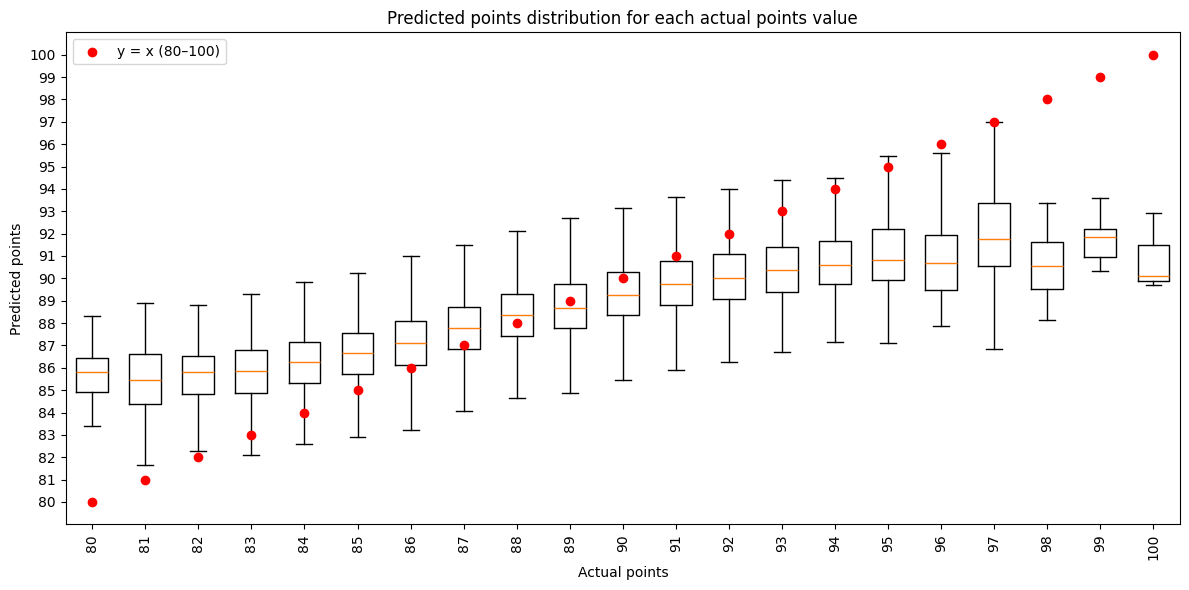

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pred_vs_actual = pd.DataFrame({
    "points": y_test,
    "predicted_points": y_pred
})

forced_points = list(range(80, 101))

data = [
    pred_vs_actual.loc[pred_vs_actual["points"] == p, "predicted_points"]
    if (pred_vs_actual["points"] == p).any()
    else pd.Series(dtype=float)
    for p in forced_points
]
plt.figure(figsize=(12, 6))
plt.boxplot(
    data,
    positions=range(1, len(forced_points) + 1),
    widths=0.6,
    showfliers=False
)

x_pos = {p: i + 1 for i, p in enumerate(forced_points)}
xs = [x_pos[p] for p in forced_points]
ys = forced_points
plt.scatter(xs, ys, color="red", zorder=3, label="y = x (80–100)")

plt.xticks(
    ticks=range(1, len(forced_points) + 1),
    labels=forced_points,
    rotation=90
)
plt.yticks(forced_points)
plt.xlabel("Actual points")
plt.ylabel("Predicted points")
plt.title("Predicted points distribution for each actual points value")
plt.legend()
plt.tight_layout()
plt.show()

## Testing other models 

### tf_idf Bigrams model

Intercept:  85.05969
Coefficients:  [ 3.5857563e+01  1.6097240e+00  3.3708410e+00  2.3691521e+00
  8.1517429e+00 -1.9627117e+01 -8.1200323e+00 -8.1908035e+00
 -1.2484381e+01 -1.3021851e-01 -2.4609137e+00 -1.7601727e+01
 -1.9424440e+01 -4.7165575e+00 -6.5227680e+00  1.6975256e+01
 -6.9570293e+00 -8.9171481e-01  3.1315849e+00 -7.4200201e+00
 -4.1751699e+00 -1.4016507e+01  4.1683917e+00 -2.6450510e+00
  2.5781536e-01 -6.8178854e+00  6.5950727e+00 -4.6654191e+00
  6.1413779e+00  3.3576274e-01  6.9779892e+00  5.6672239e+00
 -1.5382084e+01 -5.7539310e+00  4.4009266e+00  5.7752090e+00
 -6.6615343e-02 -1.4417160e+00 -5.2622223e+00 -2.3904135e+00
  2.0812082e+00  5.0845704e+00  2.2682619e+00  4.7542233e+00
  1.1524790e+01  2.4631462e+00  3.8166666e+00 -5.0290985e+00
  5.9383764e+00 -8.9316130e-01  5.1285977e+00 -1.5918255e-02
 -8.9997959e+00  3.3206816e+00 -3.9936957e+00  3.7631502e+00
 -1.2342360e+00  9.3244243e-01  1.8449068e+00 -8.2319298e+00
 -4.0608253e+00 -1.4330926e+00  5.4573135e+00  3.

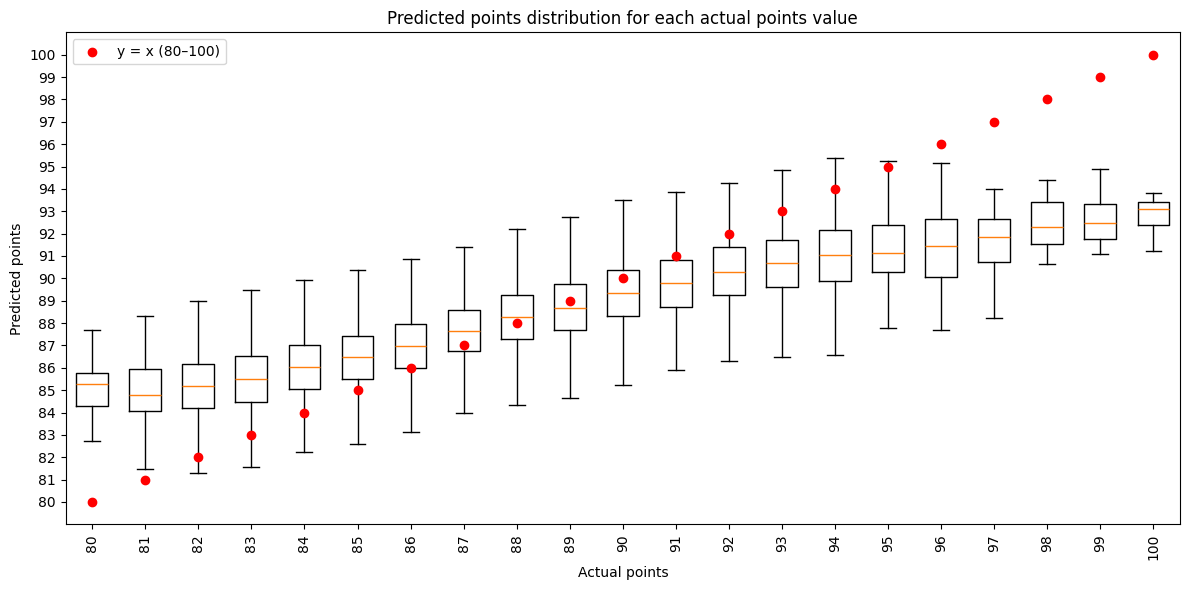

In [2]:
import pandas as pd
from review_prediction_model_using_regression import all_results
from config import *

all_results(EMBEDEDINGS_FILEPATH_tf_idf_bigrams, CSV_FILEPATH_UNCHANGED_DATA)

### Mini LML6 v2 model

Intercept:  85.01328
Coefficients:  [-3.25680423e+00  6.86767817e+00  3.21539736e+00 -4.61102962e+00
 -5.60276508e-01  1.48730040e+00 -4.96032238e-02 -2.72091103e+00
  1.34800529e+01 -2.66957712e+00 -4.04195499e+00  6.20342493e+00
  1.89227462e+00  9.81440008e-01 -9.79599380e+00  8.66160011e+00
  3.85846782e+00 -9.51557159e-02 -3.24031138e+00 -1.61299014e+00
  2.33723140e+00 -4.62645960e+00 -5.11659431e+00 -3.97385573e+00
  2.83299160e+00  6.71490717e+00  9.31134939e-01 -5.46893215e+00
  7.10169792e+00 -3.53190970e+00  5.09602785e-01  2.52351451e+00
  4.66672421e+00  6.00918865e+00  9.69693756e+00  1.19555151e+00
  2.11615396e+00 -7.57045460e+00  8.90000725e+00  1.83646989e+00
 -1.00332117e+01 -1.81754017e+00 -3.11383581e+00 -3.94081807e+00
 -2.33609676e+00  1.50322449e+00  3.85859728e-01 -3.18771601e+00
 -1.46045876e+00  3.85349464e+00 -5.16898394e+00 -1.26348424e+00
 -2.54390419e-01  1.01997709e+00 -1.99146259e+00  5.42701340e+00
 -1.15517366e+00  3.56143308e+00 -7.38370001e-01 -4.30

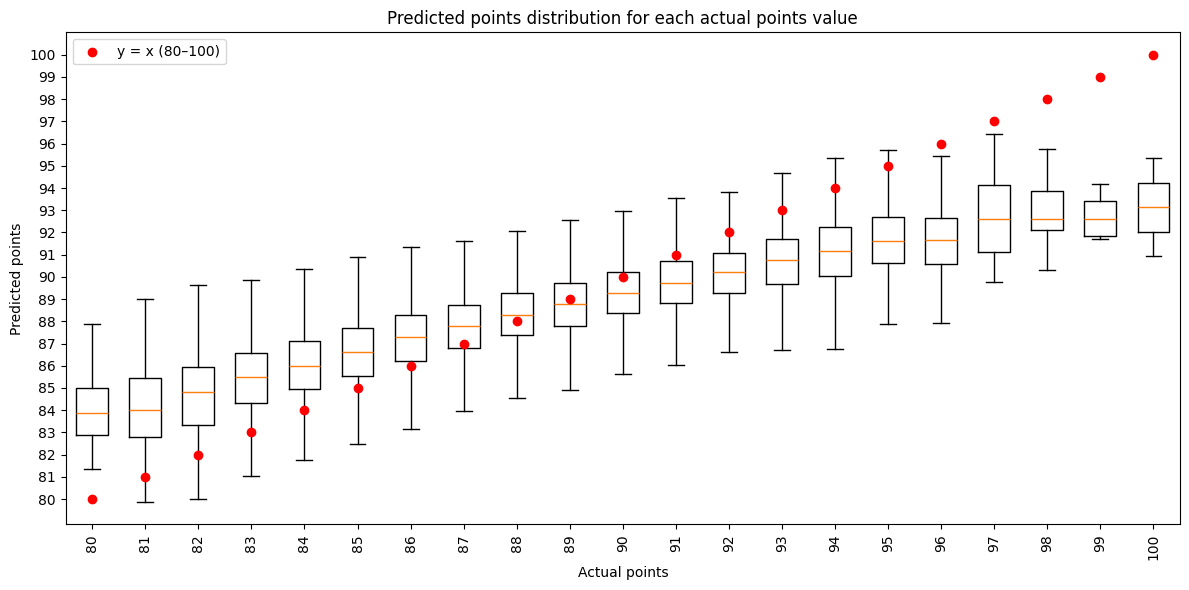

In [3]:
all_results(EMBEDEDINGS_FILEPATH_Mini_LML6_v2, CSV_FILEPATH_UNCHANGED_DATA)

### Mpnet base v2 model

Intercept:  86.85008
Coefficients:  [ 1.62274420e+00  2.81817007e+00  6.66358948e-01  6.79780006e-01
  1.89040625e+00 -5.47365332e+00  2.59555745e+00 -3.29775810e-01
 -7.84189510e+00  5.25347567e+00 -9.72399139e+00 -9.86393642e+00
 -5.30293846e+00  2.48587084e+00 -6.39152527e-03  6.75050068e+00
 -2.16091633e+00 -4.01134491e-02 -1.48926973e+01  3.24589038e+00
  3.48988914e+00 -3.90830755e+00  1.20151043e+00 -2.85099745e+00
 -6.80308628e+00  8.89849424e-01  2.76126337e+00 -5.23396015e-01
 -1.11108685e+01  1.07249510e+00 -5.83790970e+00  1.19465294e+01
  1.54522400e+01 -2.04059172e+00  2.04467418e-04 -5.46241570e+00
 -1.24646187e+00  4.13717508e+00 -1.35430269e+01  6.37863398e+00
 -4.80667925e+00  2.50810206e-01 -2.84320140e+00 -1.09410686e+01
  3.91260958e+00  3.41109586e+00 -2.86396563e-01  7.85135746e+00
  4.14592266e+00  1.10161715e+01  8.36841345e-01 -7.63675499e+00
  7.66045272e-01 -7.46380568e+00 -2.95517802e+00 -8.61038685e+00
  2.81040967e-01  2.67087150e+00 -3.75250363e+00 -5.35

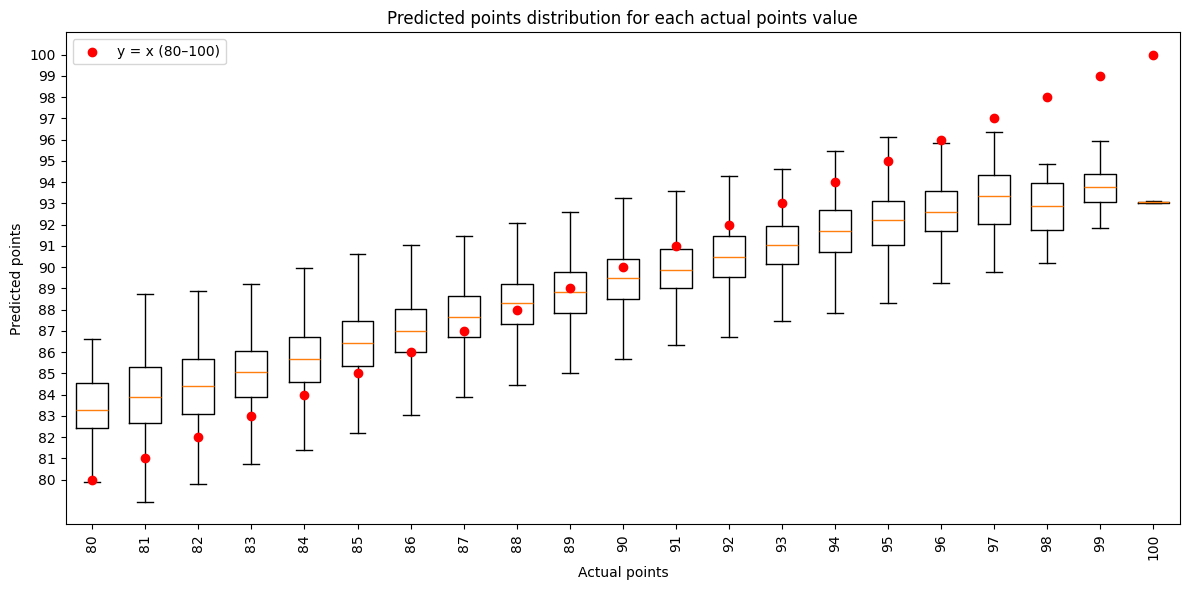

In [4]:
all_results(EMBEDEDINGS_FILEPATH_mpnet_base_v2, CSV_FILEPATH_UNCHANGED_DATA)

### Open AI model (text-embedding-3-small)

Intercept:  87.161125
Coefficients:  [ 0.15202616 -4.6654367   5.0631456  ... -4.2668166   0.21513619
  4.1046867 ]
   variant       MSE       MAE      MAPE      Rsq
0  1-basic  2.777013  1.316926  0.014902  0.69542
Saved plot to plots\predicted_points_distribution_min_occ_10.png


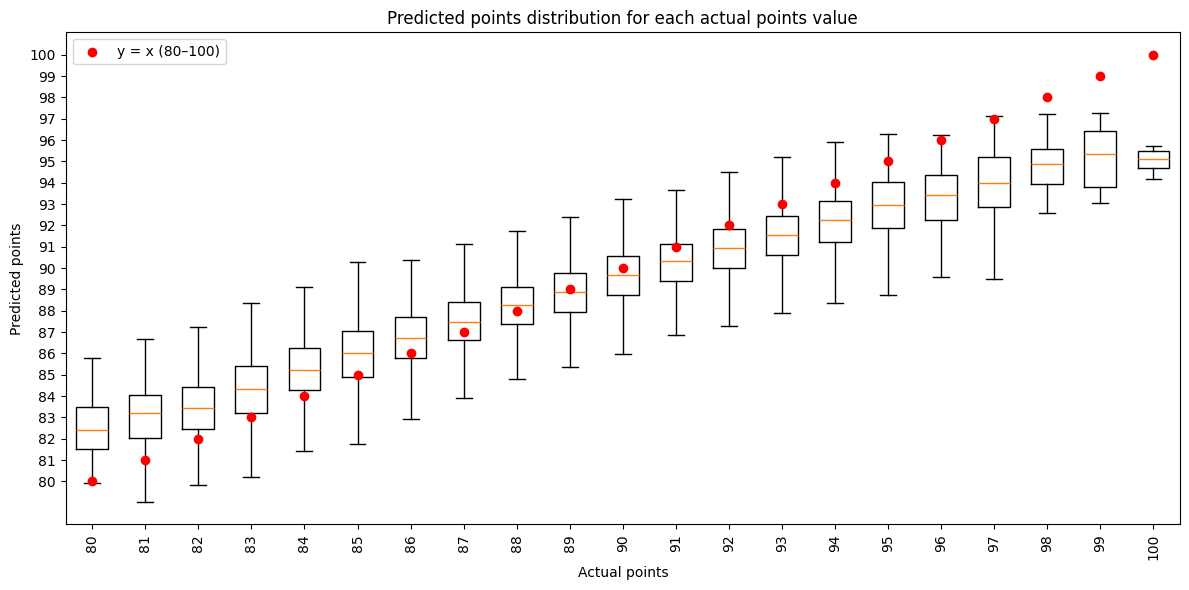

In [5]:
all_results(EMBEDEDINGS_FILEPATH_open_ai_api, CSV_FILEPATH_UNCHANGED_DATA)